In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import netCDF4 as nc
import numpy as np
import re
import datetime
from matplotlib.ticker import FixedLocator
from matplotlib.backends.backend_pdf import PdfPages
import mpld3
#mpld3.enable_notebook()
import site
import importlib
import os
import matplotlib.gridspec as gridspec

In [2]:
importlib.reload(site)
site.esat(25)*.1

3.1667404621965964

In [37]:
tstep = 1800 # site data time step
#sitename='HowardSprings'
sitename='Tumbarumba'
#CABLE_SITE_fname1 = '/OSM/CBR/OA_GLOBALCABLE/work/Vanessa/BIOS3_simulations/Test_PEST/HS_BIOS3_190215/outputs/bios_out_cable_1990_2017.nc'
#CABLE_SITE_fname1 = '/OSM/CBR/OA_GLOBALCABLE/work/Vanessa/BIOS3_simulations/HS_BIOS3/run_190525/outputs/bios_out_cable_1990_2018.nc'
CABLE_SITE_fname1 = '/OSM/CBR/OA_GLOBALCABLE/work/Vanessa/BIOS3_simulations/Tumba_BIOS3/run_190525a/outputs/bios_out_cable_1990_2018_LUC.nc'
#CABLE_SITE_fname1 = '/OSM/CBR/OA_GLOBALCABLE/work/Vanessa/BIOS3_simulations/Test_PEST/Tumba_BIOS3_190124/outputs/bios_out_cable_1990_2017.nc'
plot_dir = '/Users/hav014/Data/BIOS3/190207/'
plot_fname = 'Cumb_LAIv_vs_LAIv_AWAP_Forcing_190207.pdf'
plot_fname1 = 'Cumb_NEP_site_met_190207.pdf'
plot_fname_Evap = 'Cumb_Evap_site_met_190207.pdf'
plot_fname_GPP = 'Cumb_GPP_site_met_190207.pdf'

In [38]:
importlib.reload(site)
df1=site.read_cable_single_site_patch(CABLE_SITE_fname1)

In [39]:
#importlib.reload(site)
dfobs=site.read_ozflux(sitename,tstep)
dfobs_s=[]
for i in range(4):
    dfobs_s.append(dfobs[dfobs['season']==i+1].groupby(lambda x: x.hour).mean())

In [40]:
# get Trfs
Tref = df1['Tair'].mean()
q10 = 2
df1['Trf_Ta_h'] = site.Q10(df1['Tair'],Tref,q10)
df1['Trf_Ta_d'] = site.Q10(df1['TairDailyMean'],Tref,q10)

df1['Trf_Tsoil_h']= site.Q10(df1['SoilTemp1'],Tref,q10)
df1['Trf_Tsoil_d']=site.Q10(df1['SoilTemp1DailyMean'],Tref,q10)

grouped = df1.groupby('day')
df1 = grouped.apply(site.compute_mean_Trf) # gives us df['Daily_Mean_Trf; Daily_Mean_Trf_Tsoil'] 

df1['Ta_bar'] = 10 * np.log(df1['Daily_Mean_Trf_Ta'].values)/np.log(q10) + Tref
df1['Trf_Ta_bar'] = site.Q10(df1['Ta_bar'],Tref,q10)

df1['Tsoil_bar'] = 10 * np.log(df1['Daily_Mean_Trf_Tsoil'].values)/np.log(q10) + Tref
df1['Trf_Tsoil_bar']=site.Q10(df1['Tsoil_bar'],Tref,q10)


In [41]:
# create diurnal T response function by which to correct ecosystem respiration
df1['Trf_Ta_norm'] = df1['Trf_Ta_h'][:] / df1['Trf_Ta_bar'][:]
df1['Trf_Tsoil_norm'] = df1['Trf_Tsoil_h'][:] / df1['Trf_Tsoil_bar'][:]
x = df1.index

In [42]:
# construct diurnal cycle by season
dfs1=[]
for i in range(4):
    dfs1.append(df1[df1['season']==i+1].groupby(lambda x: x.hour).mean())

In [43]:
df1.columns.tolist()

['iveg_1',
 'iveg_2',
 'iveg_3',
 'patchfrac_1',
 'patchfrac_2',
 'patchfrac_3',
 'SWdown',
 'SWdown_1',
 'SWdown_2',
 'SWdown_3',
 'LWdown',
 'LWdown_1',
 'LWdown_2',
 'LWdown_3',
 'Tair',
 'Tair_1',
 'Tair_2',
 'Tair_3',
 'Rainf',
 'Rainf_1',
 'Rainf_2',
 'Rainf_3',
 'Snowf',
 'Snowf_1',
 'Snowf_2',
 'Snowf_3',
 'Qair',
 'Qair_1',
 'Qair_2',
 'Qair_3',
 'Wind',
 'Wind_1',
 'Wind_2',
 'Wind_3',
 'PSurf',
 'PSurf_1',
 'PSurf_2',
 'PSurf_3',
 'CO2air',
 'CO2air_1',
 'CO2air_2',
 'CO2air_3',
 'Qle',
 'Qle_1',
 'Qle_2',
 'Qle_3',
 'Qh',
 'Qh_1',
 'Qh_2',
 'Qh_3',
 'Qg',
 'Qg_1',
 'Qg_2',
 'Qg_3',
 'Qs',
 'Qs_1',
 'Qs_2',
 'Qs_3',
 'Qsb',
 'Qsb_1',
 'Qsb_2',
 'Qsb_3',
 'Evap',
 'Evap_1',
 'Evap_2',
 'Evap_3',
 'ECanop',
 'ECanop_1',
 'ECanop_2',
 'ECanop_3',
 'TVeg',
 'TVeg_1',
 'TVeg_2',
 'TVeg_3',
 'ESoil',
 'ESoil_1',
 'ESoil_2',
 'ESoil_3',
 'HVeg',
 'HVeg_1',
 'HVeg_2',
 'HVeg_3',
 'HSoil',
 'HSoil_1',
 'HSoil_2',
 'HSoil_3',
 'RnetSoil',
 'RnetSoil_1',
 'RnetSoil_2',
 'RnetSoil_3',
 

In [44]:
# construct annual cycle by month
dfm1 = df1.groupby(lambda x: x.month).mean()
df_obsm = dfobs.groupby(lambda x: x.month).mean()


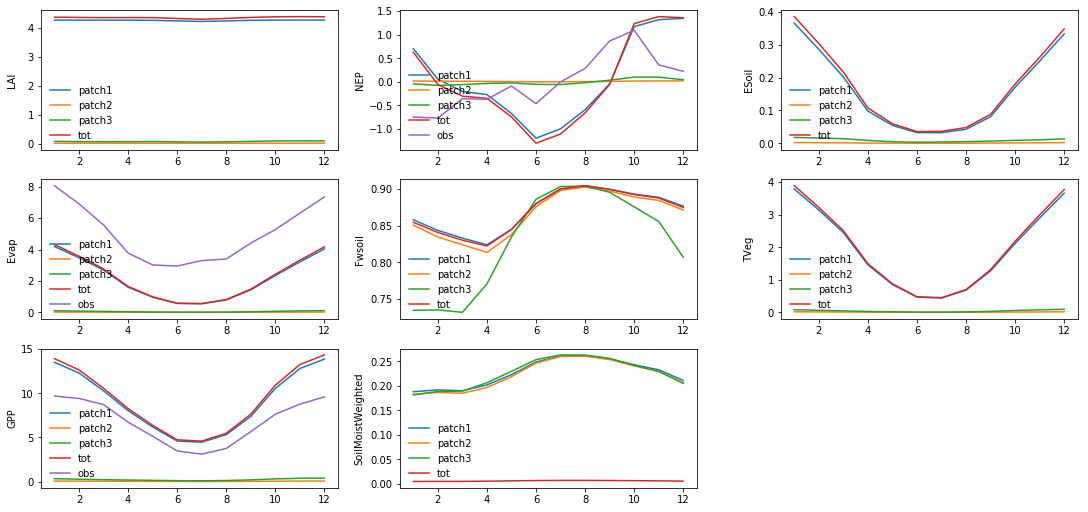

In [45]:
# plot annual cycles of variables
vars = ['LAI','Evap','GPP','NEP','Fwsoil','SoilMoistWeighted','ESoil','TVeg']
fig=plt.figure(figsize=(15, 7),constrained_layout=True)
npatch_max = 4
#gs.update(left=0.05, right=0.5, wspace=0.1, hspace =0.1, bottom = 0.3, top = 0.9)
ncols = 3
sindex=[]
if (len(vars)%ncols > 0):
    nrows = len(vars)//ncols +1
else:
    nrows = len(vars)//ncols 
gs = fig.add_gridspec(ncols=ncols, nrows=nrows)
[sindex.append((j,i)) for i in range(ncols) for j in range(nrows)]

x1 = dfm1.index

for index, v in enumerate(vars):
    ax = fig.add_subplot(gs[sindex[index]])
    for p in range(npatch_max):
        vars = v + '_' + "%1i" %(p+1)
        patchfrac = 'patchfrac' + '_' + "%1i" %(p+1)
        try:
            if v in ['SoilMoistWeighted' , 'SoilTempWeighted' , 'Fwsoil', 'SoilMoist_6']:
                y1 = dfm1[vars]
            else:
                y1 = dfm1[vars]*dfm1[patchfrac]
            plt.plot(x1,y1,label= "patch%1i" %(p+1))
        except:
            continue
    if v in ['NEP'] :
        y3 = dfm1[v] - dfm1[v].mean()
    else:
        y3 = dfm1[v]
    plt.plot(x1,y3,label="tot")
    if v in df_obsm.columns:
        if v in ['NEP'] :
            y4 = df_obsm[v] - df_obsm[v].mean()
        else:
            y4 = df_obsm[v]
        plt.plot(x1,y4,label="obs")
    ax.set_ylabel(v)       
    plt.legend(fontsize=10,frameon=False,loc=3)

fig.align_labels()  


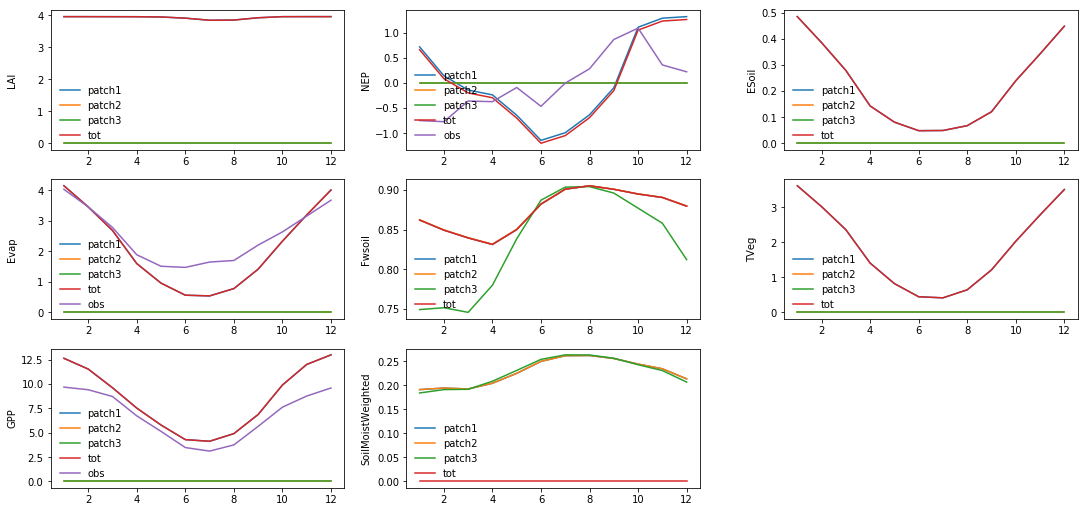

In [12]:
# plot annual cycles of variables
vars = ['LAI','Evap','GPP','NEP','Fwsoil','SoilMoistWeighted','ESoil','TVeg']
fig=plt.figure(figsize=(15, 7),constrained_layout=True)
npatch_max = 4
#gs.update(left=0.05, right=0.5, wspace=0.1, hspace =0.1, bottom = 0.3, top = 0.9)
ncols = 3
sindex=[]
if (len(vars)%ncols > 0):
    nrows = len(vars)//ncols +1
else:
    nrows = len(vars)//ncols 
gs = fig.add_gridspec(ncols=ncols, nrows=nrows)
[sindex.append((j,i)) for i in range(ncols) for j in range(nrows)]

x1 = dfm1.index

for index, v in enumerate(vars):
    ax = fig.add_subplot(gs[sindex[index]])
    for p in range(npatch_max):
        vars = v + '_' + "%1i" %(p+1)
        patchfrac = 'patchfrac' + '_' + "%1i" %(p+1)
        try:
            if v in ['SoilMoistWeighted' , 'SoilTempWeighted' , 'Fwsoil', 'SoilMoist_6']:
                y1 = dfm1[vars]
            else:
                y1 = dfm1[vars]*dfm1[patchfrac]
            plt.plot(x1,y1,label= "patch%1i" %(p+1))
        except:
            continue
    if v in ['NEP'] :
        y3 = dfm1[v] - dfm1[v].mean()
    else:
        y3 = dfm1[v]
    plt.plot(x1,y3,label="tot")
    if v in df_obsm.columns:
        if v in ['NEP'] :
            y4 = df_obsm[v] - df_obsm[v].mean()
        else:
            y4 = df_obsm[v]
        plt.plot(x1,y4,label="obs")
    ax.set_ylabel(v)       
    plt.legend(fontsize=10,frameon=False,loc=3)

fig.align_labels()  


In [16]:
dfm1[['SoilMoist_2_1','SoilMoist_3_1','SoilMoist_4_1','SoilMoist_5_1', 'SoilMoist_6_1','SoilMoistWeighted_1']]

,SoilMoist_2_1,SoilMoist_3_1,SoilMoist_4_1,SoilMoist_5_1,SoilMoist_6_1,SoilMoistWeighted_1
1,0.266108,0.266067,0.265011,0.259946,0.187457,0.264461
2,0.270860,0.271079,0.271090,0.270316,0.223442,0.270675
3,0.265649,0.265979,0.266529,0.267499,0.251076,0.266218
4,0.221187,0.223268,0.228106,0.238368,0.251707,0.226624
5,0.152306,0.161258,0.171443,0.192264,0.242178,0.166810
6,0.108940,0.126891,0.140587,0.154758,0.228389,0.130576
7,0.092026,0.115638,0.131223,0.140656,0.210421,0.118396
8,0.082256,0.110245,0.127297,0.139701,0.191056,0.113528
9,0.089481,0.112572,0.126651,0.139233,0.175258,0.115668
10,0.121364,0.131560,0.134599,0.139642,0.165291,0.131022


In [46]:
dfm1[['TotSoilCarb','TotLittCarb','TotLivBiomass']]

,TotSoilCarb,TotLittCarb,TotLivBiomass
1,308.085127,15.170585,26.251601
2,308.050148,15.140611,26.296621
3,308.029818,15.124324,26.315143
4,308.037621,15.132911,26.299180
5,308.063674,15.156556,26.259076
6,308.103174,15.191137,26.189432
7,308.142954,15.224185,26.111389
8,308.174538,15.248690,26.051059
9,308.190289,15.258149,26.024204
10,308.182831,15.246818,26.048094


In [33]:
#dfm1[['SoilMoist','vcmax_1','vcmax_2']]*1e6
#dfm1[['Fwsoil_1','Fwsoil_3','vcmax_1','TotLivBiomass', 'LAI_1','LAI_3','patchfrac_1','patchfrac_2','LAI','Evap']]
#dfm1['Qsb'].mean()/dfm1['Rainf'].mean()
#dfm1['GPP'].mean()*12*1e-6*3600*24*365
#dfm1['TotLivBiomass', 'TotSoilCarb']
dfm1[['TotSoilCarb','TotLittCarb','TotLivBiomass']]
#dfm1['patchfrac_3']

,TotSoilCarb,TotLittCarb,TotLivBiomass
1,28.389617,0.434805,0.816290
2,28.386915,0.437012,0.867713
3,28.390040,0.443434,0.895565
4,28.390667,0.445877,0.908837
5,28.394018,0.449610,0.919997
6,28.415655,0.469517,0.913738
7,28.475154,0.521936,0.840696
8,28.507950,0.542573,0.776757
9,28.499593,0.521879,0.751627
10,28.476050,0.488143,0.742233


In [ ]:
vars = ['LWdown','SWdown','Tair','Qair','vpd','Wind','ESoil','TVeg','LAI','GPP','VegT','Fwsoil','TotSoilCarb','TotLivBiomass']
fig=plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=0.3, wspace = 0.3)
slabel = ['DJF', 'MAM', 'JJA', 'SON']
x1 = dfs1[1].index
#x2 = dfs2[1].index
nv = len(vars)
for index, v in enumerate(vars):
    sindex = [(index,0),(index,1),(index,2),(index,3)]
    for i in range(4):
        ax = plt.subplot2grid((nv,4),sindex[i])
        y1 = dfs1[i][vars[index]]
        #y2 = dfs2[i][vars[index]]
        plt.plot(x1,y1,label="av")
        plt.grid(b=True, which='both', color='0.65', linestyle='-')      
        if i==0:
            ax.set_ylabel(vars[index])
        if index==0:
            ax.set_title(slabel[i])
        if index==0 and i==0:
            plt.legend(fontsize='small',frameon=False,loc=2)
fig.subplots_adjust(hspace=0.3, wspace = 0.3)

In [ ]:


fig.savefig(os.path.join(plot_dir, plot_fname), bbox_inches='tight',
                    pad_inches=0.1)

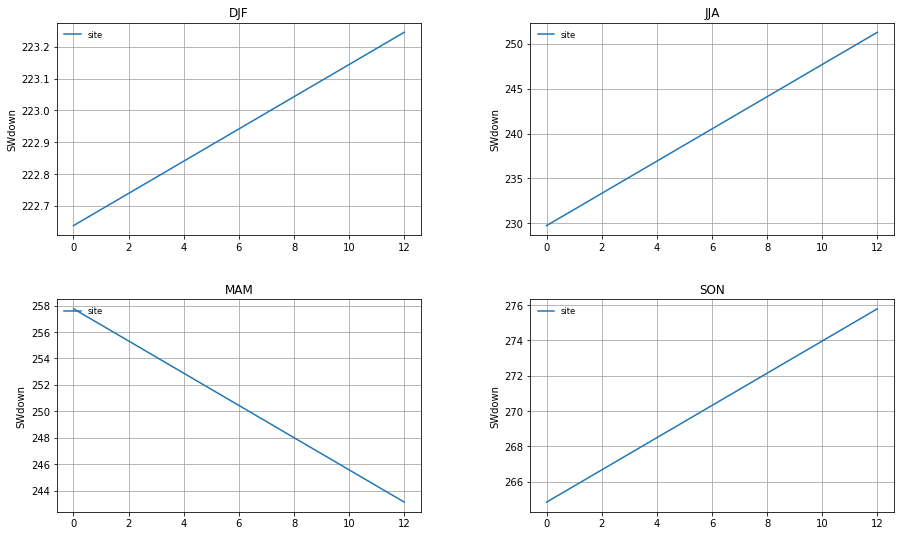

In [40]:
# compare diurnal cycle of given variable
var = 'SWdown'
fig=plt.figure(figsize=(15, 9))
fig.subplots_adjust(hspace=0.3, wspace = 0.3)
x1 = dfs1[1].index
sindex=[(0,0),(1,0),(0,1),(1,1)]
slabel = ['DJF', 'MAM', 'JJA', 'SON']
for i in range(4):
    ax = plt.subplot2grid((2,2),sindex[i])
    y1 = dfs1[i][var] 
    plt.plot(x1,y1,label="site")
    plt.grid(b=True, which='both', color='0.65', linestyle='-')
    plt.legend(fontsize='small',frameon=False,loc=2)
    ax.set_ylabel(var)
    ax.set_title(slabel[i])
    
fig.subplots_adjust(hspace=0.3, wspace = 0.3)


In [271]:
dfobs=[]
for i in range(4):
    dfobs.append(df_obs[df_obs['season']==i+1].groupby(lambda x: x.hour).mean())

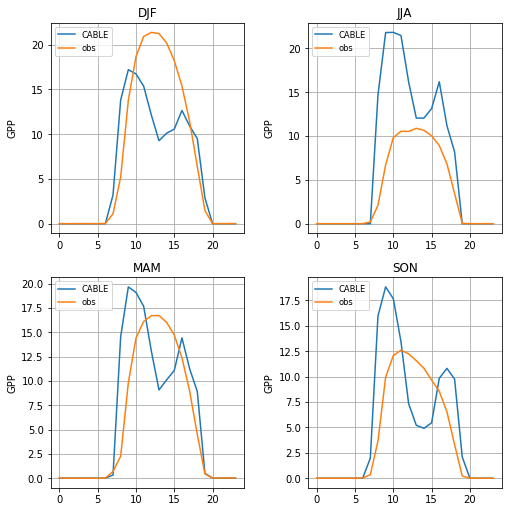

In [297]:
fig=plt.figure(figsize=(7,7), constrained_layout=True)
spec4 = fig.add_gridspec(ncols=2, nrows=2)


#f4_ax1 = fig4.add_subplot(spec4[0, 0])

v1='GPP_1'
v = 'GPP'
x = dfs1[1].index
x1 = dfobs_s[1].index
sindex=[(0,0),(1,0),(0,1),(1,1)]
slabel = ['DJF', 'MAM', 'JJA', 'SON']
for i in range(4):
    #ax = plt.subplot2grid((2,2),sindex[i])
    ax = fig.add_subplot(spec4[sindex[i]])
    y1 = dfs1[i][v1]
    y3 = dfobs_s[i][v]
    #y3 =  dfobs[i]['GPP']-dfobs[i]['NEP'] 
    y3 = y3
    plt.plot(x,y1,label="CABLE")
    plt.plot(x1,y3,label="obs")
    plt.grid(b=True, which='both', color='0.65', linestyle='-')
    plt.legend(fontsize='small',frameon=None,loc=2)
    ax.set_ylabel(v)
    ax.set_title(slabel[i])
    
#fig.subplots_adjust(hspace=0.3, wspace = 0.2)
fig.align_labels() 
plt.show()

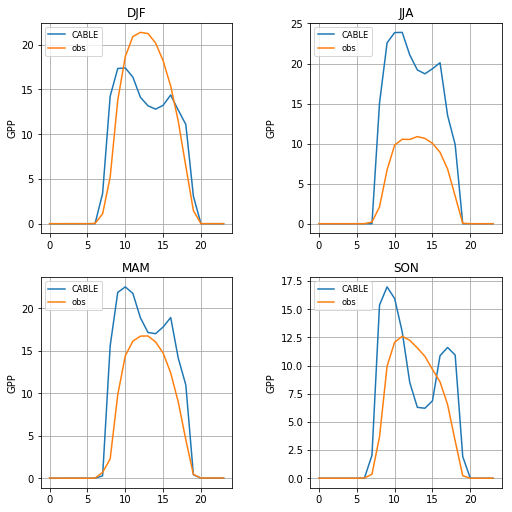

In [286]:
fig=plt.figure(figsize=(7,7), constrained_layout=True)
spec4 = fig.add_gridspec(ncols=2, nrows=2)


#f4_ax1 = fig4.add_subplot(spec4[0, 0])

v1='GPP_1'
v = 'GPP'
x = dfs1[1].index
x1 = dfobs[1].index
sindex=[(0,0),(1,0),(0,1),(1,1)]
slabel = ['DJF', 'MAM', 'JJA', 'SON']
for i in range(4):
    #ax = plt.subplot2grid((2,2),sindex[i])
    ax = fig.add_subplot(spec4[sindex[i]])
    y1 = dfs1[i][v1]
    y3 = dfobs[i][v]
    #y3 =  dfobs[i]['GPP']-dfobs[i]['NEP'] 
    y3 = y3
    plt.plot(x,y1,label="CABLE")
    plt.plot(x1,y3,label="obs")
    plt.grid(b=True, which='both', color='0.65', linestyle='-')
    plt.legend(fontsize='small',frameon=None,loc=2)
    ax.set_ylabel(v)
    ax.set_title(slabel[i])
    
#fig.subplots_adjust(hspace=0.3, wspace = 0.2)
fig.align_labels() 
plt.show()

KeyError: 'Trf_Ta_norm'

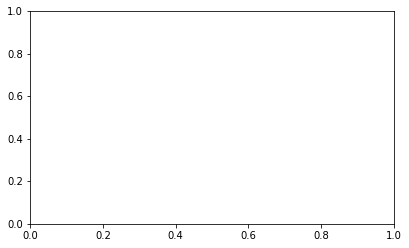

In [275]:
fig=plt.figure(figsize=(15, 9))
fig.subplots_adjust(hspace=0.3, wspace = 0.3)
x = dfs1[1].index
x1 = dfobs[1].index
sindex=[(0,0),(1,0),(0,1),(1,1)]
slabel = ['DJF', 'MAM', 'JJA', 'SON']
for i in range(4):
    ax = plt.subplot2grid((2,2),sindex[i])
    y1 = dfs1[i]['NEP'] - dfs1[i]['NEP'].mean()
    y2 = dfs1[i]['GPP'] - (dfs1[i]['HeteroResp'][:]*dfs1[i]['Trf_Ta_norm'][:])- \
    ((dfs1[i]['AutoResp'][:] -dfs1[i]['LeafResp']) *dfs1[i]['Trf_Ta_norm'][:]) - dfs1[i]['LeafResp'][:]
    y2 = y2 - y2.mean()
    y3 = dfobs[i]['NEP']-dfobs[i]['NEP'].mean()
    #y3 =  dfobs[i]['GPP']-dfobs[i]['NEP'] 
    y3 = y3 - y3.mean()
    plt.plot(x,y1,label="CABLE")
    plt.plot(x,y2,label="CABLE corr", linestyle=':',color = 'red')
    plt.plot(x1,y3,label="obs")
    plt.grid(b=True, which='both', color='0.65', linestyle='-')
    plt.legend(fontsize='small',frameon=False,loc=2)
    ax.set_ylabel('NEP anom')
    ax.set_title(slabel[i])
    
fig.subplots_adjust(hspace=0.3, wspace = 0.3)

In [ ]:
fig=plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.3, wspace = 0.1)
x = dfs1[1].index
x1 = dfobs[1].index
sindex = [(0,0),(1,0),(0,1),(1,1)]
slabel = ['DJF', 'MAM', 'JJA', 'SON']
var = 'GPP'
units = 'umol m-2 s-1'
for i in range(4):
    ax = plt.subplot2grid((2,2),sindex[i])
    y1 = dfs1[i][var] 
    y3 = dfobs[i][var]
    y2 = dfs1[i]['GPP_sunlit_J'] + dfs1[i]['GPP_shaded_J']
    y2a = dfs1[i]['GPP_sunlit_C'] + dfs1[i]['GPP_shaded_C']
    print(y2a.sum())
    print(y2.sum())
    #y2=dfs[i]['GPP']
    plt.plot(x,y1,label="CABLE")
    plt.plot(x,y2,label="CABLE: AJ ")
    plt.plot(x,y2a,label="CABLE: AC")
    plt.plot(x1,y3,label="L6 obs")
    plt.grid(b=True, which='both', color='0.65', linestyle='-')
    plt.legend(fontsize='small',frameon=True,loc=2)
    ax.set_ylabel(var+' '+units)
    ax.set_title(slabel[i])
    
fig.subplots_adjust(hspace=0.3, wspace = 0.2)
#fig.savefig(os.path.join(plot_dir, plot_fname_GPP), bbox_inches='tight',
#                    pad_inches=0.1)

In [ ]:
print(y2a.sum())
print(y2.sum())

In [ ]:
# plot monthly time-series
dfm1=df1.resample('M').mean()
plt.plot(dfm1['GPP'])

In [ ]:
2.0 + 0.025*1800

In [ ]:
94/10000

In [ ]:
1/(365*(47/60)**-1.2)*365

In [ ]:
0.31/0.65

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0, :])
ax.plot(np.arange(0, 1e6, 1000))
ax.set_ylabel('YLabel0')
ax.set_xlabel('XLabel0')

for i in range(2):
    ax = fig.add_subplot(gs[1, i])
    ax.plot(np.arange(1., 0., -0.1) * 2000., np.arange(1., 0., -0.1))
    ax.set_ylabel('YLabel1 %d' % i)
    ax.set_xlabel('XLabel1 %d' % i)
    if i == 0:
        for tick in ax.get_xticklabels():
            tick.set_rotation(55)
#fig.align_labels()  # same as fig.align_xlabels(); fig.align_ylabels()

In [ ]:
fig5 = plt.figure(figsize=(7,7),constrained_layout=True)
widths = [2, 3, 1.5]
heights = [1, 3, 2]
spec5 = fig5.add_gridspec(ncols=3, nrows=3, width_ratios=widths,
                          height_ratios=heights)
for row in range(3):
    for col in range(3):
        ax = fig5.add_subplot(spec5[row, col])
        label = 'Width: {}\nHeight: {}'.format(widths[col], heights[row])
        ax.annotate(label, (0.1, 0.5), xycoords='axes fraction', va='center')

In [ ]:
fig4 = plt.figure(constrained_layout=True)
spec4 = fig4.add_gridspec(ncols=2, nrows=2)
anno_opts = dict(xy=(0.5, 0.5), xycoords='axes fraction',
                 va='center', ha='center')

f4_ax1 = fig4.add_subplot(spec4[0, 0])
f4_ax1.annotate('GridSpec[0, 0]', **anno_opts)
fig4.add_subplot(spec4[0, 1]).annotate('GridSpec[0, 1:]', **anno_opts)
fig4.add_subplot(spec4[1, 0]).annotate('GridSpec[1:, 0]', **anno_opts)
fig4.add_subplot(spec4[1, 1], frame_on=True)

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_axes([0.1, 0.1, 0.4, 0.4])
ax1.set_xticks([0., 0.2, 0.4, 0.6, 0.8])
ax1.set_yticks([0., 0.2, 0.4, 0.6, 0.8])
ax2 = fig.add_axes([0.1, 0.5, 0.4, 0.4])
ax2.set_xticklabels('')
#ax3 = fig.add_axes([0.5, 0.1, 0.4, 0.4])
#ax3.set_yticklabels('')
#ax4 = fig.add_axes([0.5, 0.5, 0.4, 0.4])
#ax4.set_xticklabels('')
#ax4.set_yticklabels('')

In [ ]:
fig1.savefig('tmp.pdf', bbox_inches='tight',pad_inches=0.1)

In [330]:
from struct import *
f = open('/Users/hav014/Data/BIOS3/190217/clayfrac2.bin', 'rb')
#struct = {'float'}
#dt = np.dtype([('temp', float)])
tmp=f.read(4)
print(tmp)
print(unpack("<f",tmp)[0])
#ord(tmp[1])

b'\xcd\xcc\xcc>'
0.4000000059604645


In [153]:
temp

NameError: name 'temp' is not defined